#### ISyE6669 HW06 - Graham Billey, Spring 2020

In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import cvxpy as cp
from mpl_toolkits.mplot3d import Axes3D 
# from cvxpy import *

#### Problem 01

Implement the stochastic inventory control model in CVXPY with the following data.



Stochastic optimization models have the following general formula:

----

$ \min_x \,\,\, cx + E_d[Q(x,d)] $

$ s.t. \,\,\, 0 \leq x \leq \bar x $

----

$ Q(x, d) = \min_{y,z} \,\,\, -ry-sz $

$ s.t. \,\,\, y \leq d $

$ \quad\quad y + z \leq x $

$ \quad\quad y \geq 0, z \geq 0 $

In this case, we are condisering demand $d$ to be a discreet random variable with S scenarios. Each $d_i$ will have probability $p_i$. Thus the optimization becomes:

----

$ \min_{x,y_i,z_i} \,\,\, cx + \sum_{i=1}^S p_i(-r y_i - s z_i) $

$ s.t. \,\,\, 0 \leq x \leq \bar x \quad\quad \forall i = 1, ..., S $

$ \quad\quad y_i \leq d_i \quad\quad\quad \forall i = 1, ..., S $

$ \quad\quad -x + y_i + z_i \leq 0 \quad\quad \forall i = 1, ..., S $

$ \quad\quad y_i \geq 0, z_i \geq 0 \quad\quad\quad \forall i = 1, ..., S $

(a) Demand d can take 3 values: $d_1$ `= 30`, $d_2$ `= 40`, $d_3$ `= 50`, with the probablity $p_1$ `= 0.3`, $p_2$ `= 0.4`, $p_3$ `= 0.3`, respectively.

(b) Unit cost $c$ `= 15`, retail price $r$ `= 50`, discount price $s$ `= 10`.

(c) Production capacity $\bar{x}$ `= 75`

In [26]:
# Declare constants
d = [30, 40, 50]
p = [0.3, 0.4, 0.3]

c = 15
r = 50
s = 10

x_bar = 75

# Declare variables
x = cp.Variable()
y = cp.Variable(3)
z = cp.Variable(3)

# Define objective function
def cost(x, y, z, d, p, c, r, s, x_bar):
    # First stage cost
    first = c*x
    
    # Second stage cost
    second = p[0]*(-r*y[0] - s*z[0]) + p[1]*(-r*y[1] - s*z[1]) + p[2]*(-r*y[2] - s*z[2])
    
    return first + second

# Define constraints
constraints = [
    0 <= x,
    x <= x_bar,
    y[0] <= d[0],
    y[1] <= d[1],
    y[2] <= d[2],
    -x + y[0] + z[0] <= 0,
    -x + y[1] + z[1] <= 0,
    -x + y[2] + z[2] <= 0,
    y[0] >= 0,
    y[1] >= 0,
    y[2] >= 0,
    z[0] >= 0,
    z[1] >= 0,
    z[2] >= 0
]

# Solve and print outputs
objective = cp.Minimize(cost(x, y, z, d, p, c, r, s, x_bar))
myprob = cp.Problem(objective, constraints)
myprob.solve()


print (f'The optimal cost value is: ${myprob.value}')
print (f'The optimal x value is: {x.value}')


The optimal cost value is: $-1350.0
The optimal x value is: 50.0


#### Problem 02

Given a set of training data $ {x_i,y_i}_{i=1,...,N} $, where $ x_i $ is an n-dimensional feature vector and $ y_i $ is a label of value either 0 or 1. Think about each $ x_i $ represents a vector of lab test data of a patient $ i $ and $ y_i $ labels if this person has a certain disease. We want to build a linear classifier, i.e. a linear function $ f(x) = \beta_0 + \sum^n_{j=1} \beta_jx_j $, so that for a given feature vector $x$, if $ f(x) ≥ 0.5 $, then $ x $ is classified as $ y $ = 1, otherwise classified as $ y $ = 0. 

Consider the following robust absolute deviation regression model.

$$ (RADR) \min_{\beta_{0}, \ldots, \beta_{n}} \max_{i=1,2,\ldots,N}\ \left\lvert y_i−\beta_0−\sum^n_{j=1} \beta_j x_{ij}\ \right\rvert , $$

where $ x_{ij} $ is the $ jth $ component of vector $ x_i $. Notice that the $ RADR $ model is a nonlinear optimization problem.

Answer the following questions.

(a) The objective function $ f(\beta_0,...,\beta_n) $ of $ (RADR) $ is defined as

$$ f(\beta_0,...,\beta_n) = \max_{i=1,2,\ldots,N}\ \left\lvert y_i−\beta_0−\sum^n_{j=1} \beta_j x_{ij} \right\rvert . $$ 

Is $ f(\beta_0,...,\beta_n) $ a convex function of $ \beta_0,...,\beta_n $ ?  Explain why.  Hint: Function $ f $ is a maximum of absolute value functions. Is each $ | y_i−\beta_0−\sum^n_{j=1} \beta_j x_{ij} | $ a convex function of $ \beta $? Then, use the operation that preserves convexity to conclude about $ f $.

---
**Student's Answer:**


The following operations preserve convexity:

- A Nonnegative weighted sum of convex functions in convex.

- The pointwise maximum of convex functions is convex.

- Composition: Let $f : \mathbb R^m \rightarrow \mathbb R$ be a convex function, and $g_i : \mathbb R^n \rightarrow \mathbb R$ be convex $\forall i = 1, ..., m$. The the composition function $ h(\vec x) = f(g_1(x), g_2(x), ..., g_m(x)) $ is convex if either f is nondecreasing, or if each $g_i$ is a linear function.

From the above operations that complexity, we can see:

- Let $g_i(X) = \left\lvert y_i−\beta_0−\sum^n_{j=1} \beta_j x_{ij} \right\rvert$. It is obtained by the composition of the convex function $\left\lvert \cdot \right\rvert$ and the linear function $y_i−\beta_0−\sum^n_{j=1} \beta_j x_{ij}$. **Therefore $g_i(x)$ is convex.**

- $f$ is obtained by taking a pointwise maximum of these convex $g_i(x)$ functions.

Since the pointwise maximum of convex functions is also convex, we conclude that **f is convex.**

---

(b) Write a linear programming reformulation of (RADR).


---
**Student's Answer:**

The original problem is: $$\min_{\beta} \,\,\, \max_{i} \left\lvert y_i−\beta_0−\sum^n_{j=1} \beta_j x_{ij}\ \right\rvert$$

Let us define $u_i$ as: $$ u_i = y_i−\beta_0−\sum^n_{j=1} \beta_j x_{ij} $$

The original problem can be rewritten as: $$\min_{\beta} \,\,\, \max_{i} \left\lvert u_i \right\rvert$$

If we replace the objective function with another variable $z \geq \max \left\lvert u_i \right\rvert$, we get: $$\min_{\beta} \,\,\, z$$

$$s.t. \quad \max_{i}  \left\lvert u_i \right\rvert \leq z$$

--- 

Since $\max \left\lvert u_i \right\rvert \leq z$ is equivalent to _**each**_ $\left\lvert u_i \right\rvert \leq z$, we get:

$$ \min_{\beta} \,\,\, z $$

$$ s.t. \quad\quad \left\lvert u_i \right\rvert \leq  z \,\,\,\, \forall  i = 1, ..., N $$


---

Since: $$ \quad \left\lvert u_i \right\rvert = \max(u_i, -u_i) $$

We can rewrite the problem as: $$\min_{\beta} \,\,\, z$$

$$s.t. \quad -z \leq u_i \leq z \,\,\,\, \forall  i = 1, ..., N $$

---

Plugging our original definiton back in for $u_i$ we get the following reformulation of the original problem:

$$\min_{\beta} \,\,\, z$$

$$ s.t. $$

$$y_i−\beta_0−\sum^n_{j=1} \beta_j x_{ij} \leq z \,\,\,\, \forall  i = 1, ..., N $$

$$ \quad y_i−\beta_0−\sum^n_{j=1} \beta_j x_{ij} \geq -z \,\,\,\, \forall  i = 1, ..., N $$

---

(c) Code your LP reformulation of (RADR) in CVXPY, using the data file provided.

In [81]:
## from ISYE6669_HW6_q2_starter.py

# read in the data
data = pd.read_table('regression.dat', delim_whitespace=True, header = None)

# the number of data points and features for data splitting
nData = 100 
nFeature = 2

# data cleansing and formatting for Python 3
x = data.values[0: nData, :]
x = np.concatenate((x[0,3:].reshape((1,2)), x[1:,:nFeature]), axis=0).astype(float)
y = data.values[nData:, :]
y = np.append(y[1,3], y[2:,0])
y[-1] = 1
y = y.astype(float)


In [117]:
# Declare variables
b0 = cp.Variable()
b1 = cp.Variable()
b2 = cp.Variable()
z = cp.Variable()
   

# Define constraints
constraints = []
for i in range(nData):
    eq1 = b0 + b1*x[i,0] + b2*x[i,1] - y[i] <= z
    eq2 = b0 + b1*x[i,0] + b2*x[i,1] - y[i] >= -z
    constraints.append(eq1)
    constraints.append(eq2)
    
# Solve and print outputs
objective = cp.Minimize(z)
myprob2 = cp.Problem(objective, constraints)
myprob2.solve()

print (f'The optimal z value is:  {np.round(z.value,10)}')
print (f'The optimal b0 value is: {np.round(b0.value,10)}')
print (f'The optimal b1 value is: {np.round(b1.value,10)}')
print (f'The optimal b2 value is: {np.round(b2.value,10)}')


The optimal z value is:  0.5000037897
The optimal b0 value is: 0.5000012792
The optimal b1 value is: -1.9441e-06
The optimal b2 value is: 1.9195e-06


(d) Write a Python code to plot the data points and the hyperplane obtained from (RADR).

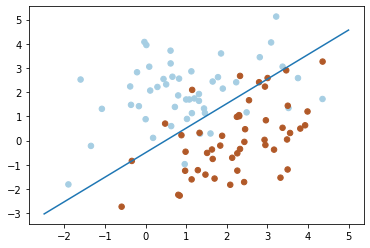

In [127]:
# Show the original data
plt.scatter(x[:, 0], x[:, 1], c=y, s=30, cmap=plt.cm.Paired)

# Create the hyperplane
a = b1.value / b2.value
xx = np.linspace(-2.5, 5)
yy = -a * xx - b0.value
plt.plot(xx, yy)

plt.show()